# UB Apartment Price Prediction

An explanation of key features:
- `rooms`: number of rooms in apartment
- `year_built`: the reported year the building was made
- `location`: the neighborhood or more specific location than district
- `building_floor_num`: number of floors in building
- `garage`: is a garage available
- `district`: district in Ulaanbaatar
- `leasing`: is private or bank leasing available?
- `balcony`: how many balconies does the apartment have?
- `size_meters`: size of apartment in meters
- `door_type`: type of front door
- `apartment_floor_num`: the floor the apartment is located on
- `window_type`: the type of the windows
- `num_windows`: the number of windows in the apartment
- `floor_type`: the type of the floor in the apartment

At first, when I haven't seen lectures, I've used .replace() function to encode all the catergorical variables into numbers. Because that I've used those converted data to make prediction and upload on Ml.Letu.net I've kept them that way. So basically after EDA section, there are two different parts that I encoded the categorical data. First, the one that I used .replace() and predictions. Second, the one that I've supposed to do it like. Used label encoding.

## Importing Libraries 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import plotly.express as px
import numpy as np
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.5f' % x)
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] =  (12, 8)

In [3]:
y = pd.read_csv('y.csv', thousands=',')

In [4]:
X = pd.read_csv('X.csv', thousands=',')

In [5]:
test = pd.read_csv('test.csv', index_col='id', thousands=',')

In [6]:
y

,price
0,2654028.43602
1,1737704.91803
2,1773049.64539
3,1520527.11607
4,1107142.85714
...,...
3857,1851851.85185
3858,2063492.06349
3859,1631578.94737
3860,1763440.86022


In [7]:
X

,rooms,year_built,location,building_floor_num,garage,district,leasing,balcony,size_meters,door_type,apartment_floor_num,window_type,num_windows,floor_type
0,5+ өрөө,2010,Зайсан,14,Байгаа,Хан-Уул,Лизинггүй,2 тагттай,105.50000,Төмөр вакум,5,Модон вакум,5,Паркет
1,2 өрөө,2019,Нисэх,12,Байгаа,Хан-Уул,Хувь лизингтэй,1 тагттай,61.00000,Төмөр,6,Вакум,3,Паркет
2,2 өрөө,2017,Бусад,16,Байгаа,Баянзүрх,Банкны лизингтэй,1 тагттай,42.30000,Вакум,9,Вакум,2,Паркет
3,2 өрөө,2009,25-р эмийн сан,6,Байгаа,Баянгол,Лизинггүй,1 тагттай,59.19000,Бүргэд,2,Вакум,4,Паркет
4,2 өрөө,1994,21-р хороолол,5,Байхгүй,Сонгино Хайрхан,Лизинггүй,1 тагттай,56.00000,Бүргэд,1,Вакум,3,Цемент
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3857,2 өрөө,2020,Яармаг,12,Байгаа,Хан-Уул,Лизинггүй,1 тагттай,54.00000,Төмөр,5,Вакум,4,Паркет
3858,2 өрөө,2014,Баянбүрд,12,Байгаа,Чингэлтэй,Банкны лизингтэй,1 тагттай,63.00000,Бүргэд,4,Вакум,5,Паркет
3859,1 өрөө,2014,100 айл,12,Байхгүй,Сүхбаатар,Банкны лизингтэй,1 тагттай,38.00000,Бүргэд,8,Вакум,2,Паркет
3860,2 өрөө,2019,Бусад,12,Байхгүй,Хан-Уул,Лизинггүй,1 тагттай,46.50000,Бүргэд,4,Вакум,2,Паркет


In [8]:
test

,rooms,year_built,location,building_floor_num,garage,district,leasing,balcony,size_meters,door_type,apartment_floor_num,window_type,num_windows,floor_type
id,,,,,,,,,,,,,,
3901,2 өрөө,2019,100 айл,12,Байхгүй,Сүхбаатар,Лизинггүй,1 тагттай,38.00000,Бүргэд,3,Вакум,2,Паркет
353,2 өрөө,2019,15-р хороолол,16,Байхгүй,Баянзүрх,Лизинггүй,1 тагттай,51.00000,Бүргэд,3,Вакум,2,Паркет
2978,1 өрөө,1980,"3, 4 хороолол",9,Байхгүй,Баянгол,Лизинггүй,1 тагттай,36.60000,Бүргэд,8,Вакум,2,Паркет
1197,1 өрөө,2010,Баянбүрд,10,Байхгүй,Чингэлтэй,Лизинггүй,1 тагттай,29.00000,Бүргэд,5,Вакум,1,Паркет
2121,2 өрөө,2017,Зайсан,9,Байхгүй,Хан-Уул,Лизинггүй,1 тагттай,101.00000,Бүргэд,8,Вакум,3,Паркет
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,3 өрөө,2015,Зайсан,12,Байхгүй,Хан-Уул,Банкны лизингтэй,1 тагттай,108.00000,Бүргэд,1,Вакум,4,Паркет
2998,5+ өрөө,2014,Зайсан,9,Байгаа,Хан-Уул,Лизинггүй,1 тагттай,137.00000,Бүргэд,6,Вакум,6,Паркет
1862,1 өрөө,2013,13-р хороолол,12,Байхгүй,Баянзүрх,Лизинггүй,1 тагттай,26.16000,Бүргэд,8,Вакум,1,Паркет


In [9]:
X.isnull().sum()

rooms                  0
year_built             0
location               0
building_floor_num     0
garage                 0
district               0
leasing                0
balcony                0
size_meters            0
door_type              0
apartment_floor_num    0
window_type            0
num_windows            0
floor_type             0
dtype: int64

## EDA

In [10]:
df = pd.concat([X, y], axis=1)
df

,rooms,year_built,location,building_floor_num,garage,district,leasing,balcony,size_meters,door_type,apartment_floor_num,window_type,num_windows,floor_type,price
0,5+ өрөө,2010,Зайсан,14,Байгаа,Хан-Уул,Лизинггүй,2 тагттай,105.50000,Төмөр вакум,5,Модон вакум,5,Паркет,2654028.43602
1,2 өрөө,2019,Нисэх,12,Байгаа,Хан-Уул,Хувь лизингтэй,1 тагттай,61.00000,Төмөр,6,Вакум,3,Паркет,1737704.91803
2,2 өрөө,2017,Бусад,16,Байгаа,Баянзүрх,Банкны лизингтэй,1 тагттай,42.30000,Вакум,9,Вакум,2,Паркет,1773049.64539
3,2 өрөө,2009,25-р эмийн сан,6,Байгаа,Баянгол,Лизинггүй,1 тагттай,59.19000,Бүргэд,2,Вакум,4,Паркет,1520527.11607
4,2 өрөө,1994,21-р хороолол,5,Байхгүй,Сонгино Хайрхан,Лизинггүй,1 тагттай,56.00000,Бүргэд,1,Вакум,3,Цемент,1107142.85714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3857,2 өрөө,2020,Яармаг,12,Байгаа,Хан-Уул,Лизинггүй,1 тагттай,54.00000,Төмөр,5,Вакум,4,Паркет,1851851.85185
3858,2 өрөө,2014,Баянбүрд,12,Байгаа,Чингэлтэй,Банкны лизингтэй,1 тагттай,63.00000,Бүргэд,4,Вакум,5,Паркет,2063492.06349
3859,1 өрөө,2014,100 айл,12,Байхгүй,Сүхбаатар,Банкны лизингтэй,1 тагттай,38.00000,Бүргэд,8,Вакум,2,Паркет,1631578.94737
3860,2 өрөө,2019,Бусад,12,Байхгүй,Хан-Уул,Лизинггүй,1 тагттай,46.50000,Бүргэд,4,Вакум,2,Паркет,1763440.86022


In [11]:
df.dtypes

rooms                   object
year_built               int64
location                object
building_floor_num       int64
garage                  object
district                object
leasing                 object
balcony                 object
size_meters            float64
door_type               object
apartment_floor_num      int64
window_type             object
num_windows              int64
floor_type              object
price                  float64
dtype: object

### Rooms

In [12]:
df['rooms'].unique()

array(['5+ өрөө', '2 өрөө', '1 өрөө', '4 өрөө', '3 өрөө'], dtype=object)

In [13]:
room_price = df.groupby('rooms').mean()['price']

In [14]:
room_price

rooms
1 өрөө    1815089.24843
2 өрөө    1864288.03249
3 өрөө    2096827.96152
4 өрөө    2571603.26962
5+ өрөө   2561419.42799
Name: price, dtype: float64

In [15]:
room_price.index

Index(['1 өрөө', '2 өрөө', '3 өрөө', '4 өрөө', '5+ өрөө'], dtype='object', name='rooms')

Text(0, 0.5, 'Average Price')

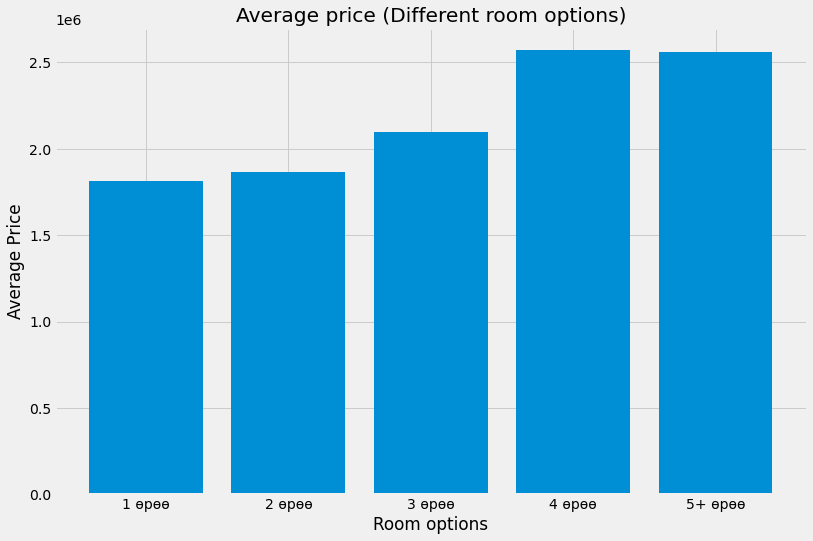

In [16]:
plt.bar(room_price.index, room_price)
plt.title('Average price (Different room options)')
plt.xlabel('Room options')
plt.ylabel('Average Price')

### Year built

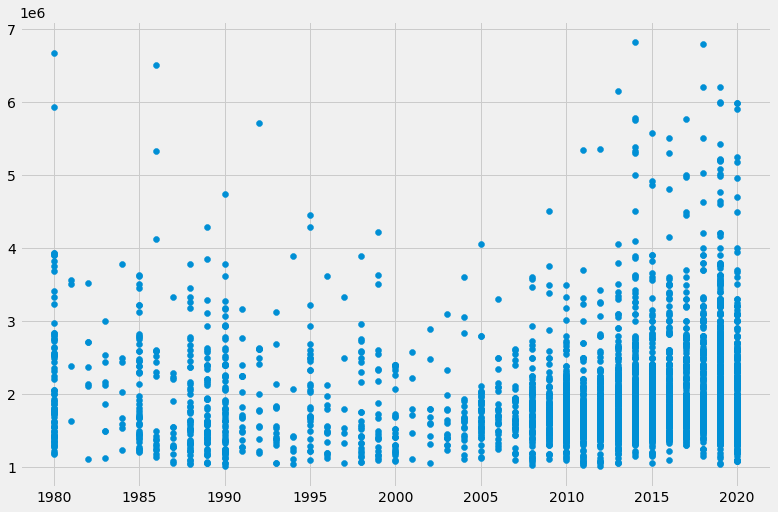

In [17]:
plt.scatter(df['year_built'], df['price'])

Text(0.5, 1.0, 'Price based on year built)')

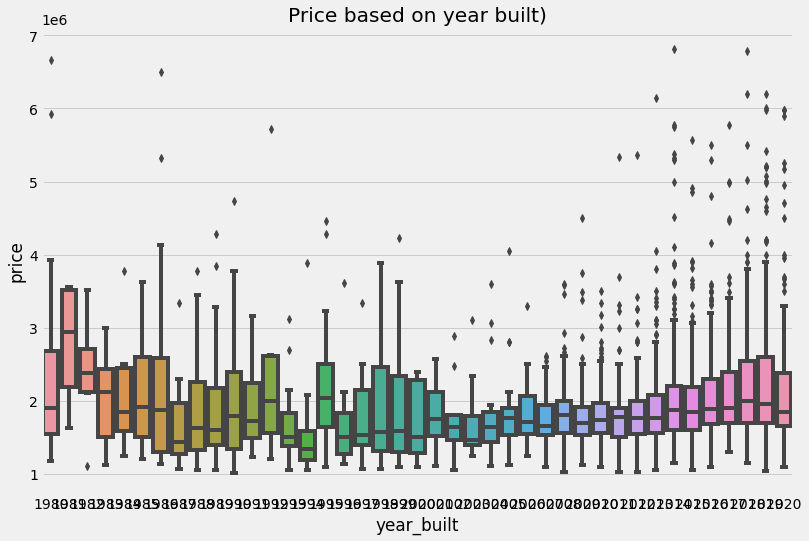

In [18]:
sns.boxplot(x="year_built", y="price", data=df)
plt.title('Price based on year built)')

Overall, the highest average price belongs to 1981s. But as recent the appartment built, it's likely to have higher price. Especially last 12 years have so many higher price exceptions than their averages.

In [19]:
year_price = df.groupby('year_built').mean()['price'].sort_values(0, False)

In [20]:
year_price

year_built
1981   2765376.98413
1982   2382694.33768
1986   2315216.75323
1980   2254780.86782
1992   2238626.77980
2018   2229294.48002
2019   2225529.58027
1995   2148857.80802
1985   2125321.84927
2017   2116213.92966
1984   2096704.82295
2016   2082626.05614
2020   2067929.68554
2014   2067079.64383
1983   2027446.71028
2015   1976976.62013
1990   1976395.13130
1999   1947137.76091
1991   1889850.83905
2013   1888582.17634
1988   1874241.58061
1997   1860859.28341
1998   1847088.27358
2008   1825923.47070
2012   1825614.88747
1989   1825334.99253
2006   1822101.21562
2009   1819075.22980
2001   1814874.63686
2004   1803549.69547
2011   1800101.08943
2005   1787004.86840
2010   1781877.01006
2002   1763997.97326
2007   1755824.98939
1993   1683725.91014
1994   1680305.13150
2000   1679722.80804
2003   1678841.91766
1996   1663054.16606
1987   1648874.21338
Name: price, dtype: float64

### Building_floor_num

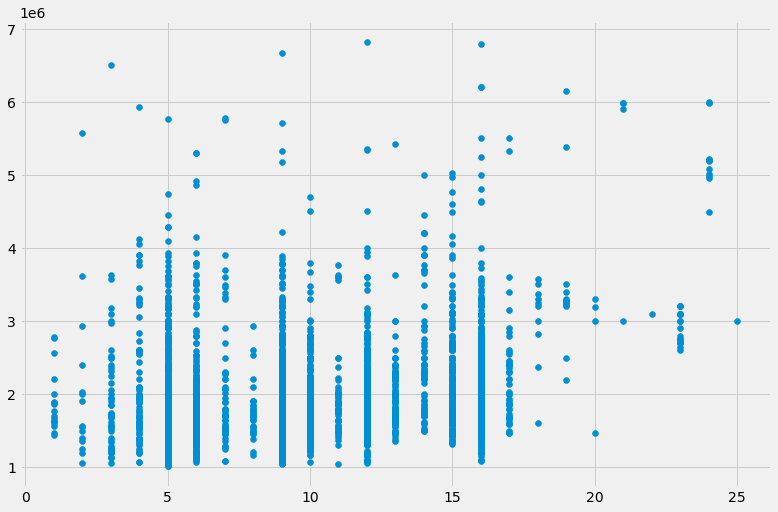

In [21]:
plt.scatter(df['building_floor_num'], df['price'])

### Garage                  

In [22]:
df['garage'].unique()

array(['Байгаа', 'Байхгүй'], dtype=object)

In [23]:
garage_price = df.groupby('garage').mean()['price'].sort_values(0, False)

In [24]:
garage_price

garage
Байгаа    2287284.78344
Байхгүй   1942718.58707
Name: price, dtype: float64

### District  

In [25]:
district_price = df.groupby('district').mean()['price'].sort_values(0, False)

In [26]:
district_price

district
Сүхбаатар         2459041.64659
Хан-Уул           2274664.26889
Чингэлтэй         2154775.85353
Баянзүрх          1875958.09980
Баянгол           1838376.76187
Сонгино Хайрхан   1543774.96137
Name: price, dtype: float64

In [27]:
 df.groupby('district').mean()['price'].sort_values().index

Index(['Сонгино Хайрхан', 'Баянгол', 'Баянзүрх', 'Чингэлтэй', 'Хан-Уул',
       'Сүхбаатар'],
      dtype='object', name='district')

### Leasing

In [28]:
leasing_price = df.groupby('leasing').mean()['price'].sort_values(0, False)

In [29]:
leasing_price

leasing
Хувь лизингтэй     2062355.80163
Банкны лизингтэй   2014029.87977
Лизинггүй          2005743.27897
Name: price, dtype: float64

In [30]:
df.groupby('leasing').mean()['price'].sort_values().index

Index(['Лизинггүй', 'Банкны лизингтэй', 'Хувь лизингтэй'], dtype='object', name='leasing')

### Balcony                 

In [31]:
balcony_price = df.groupby('balcony').mean()['price'].sort_values(0, False)

In [32]:
balcony_price

balcony
3+ тагттай   2270919.72275
2 тагттай    2149871.59983
1 тагттай    1987156.07272
Тагтгүй      1982533.69070
Name: price, dtype: float64

### size_meters            

Text(0, 0.5, 'Price')

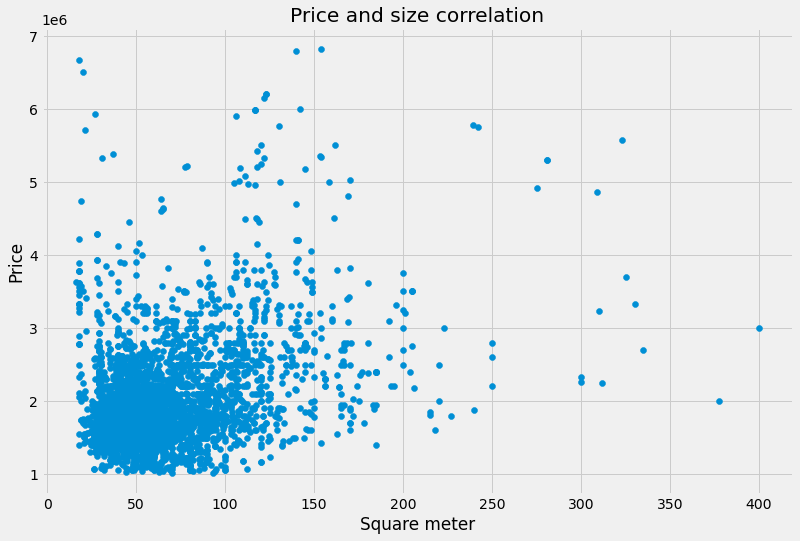

In [33]:
plt.scatter(df['size_meters'], df['price'])
plt.title('Price and size correlation')
plt.xlabel('Square meter')
plt.ylabel('Price')

From what I see from the scatter plot, the most of the square meter is between 25 and 150, and price is between 1 to 4 million. Other than that there is no really huge correlation between meter square and price. 

### door_type

In [34]:
df['door_type'].unique()

array(['Төмөр вакум', 'Төмөр', 'Вакум', 'Бүргэд', 'Мод'], dtype=object)

In [35]:
df.groupby('door_type').mean()['price'].sort_values(0, False)

door_type
Төмөр вакум   2485355.03400
Мод           2255128.75746
Төмөр         2181525.85138
Бүргэд        1960224.98876
Вакум         1905025.58011
Name: price, dtype: float64

In [36]:
df.groupby('door_type').mean()['price'].sort_values().index

Index(['Вакум', 'Бүргэд', 'Төмөр', 'Мод', 'Төмөр вакум'], dtype='object', name='door_type')

### apartment_floor_num

In [37]:
df.columns

Index(['rooms', 'year_built', 'location', 'building_floor_num', 'garage',
       'district', 'leasing', 'balcony', 'size_meters', 'door_type',
       'apartment_floor_num', 'window_type', 'num_windows', 'floor_type',
       'price'],
      dtype='object')

Text(0, 0.5, 'Price')

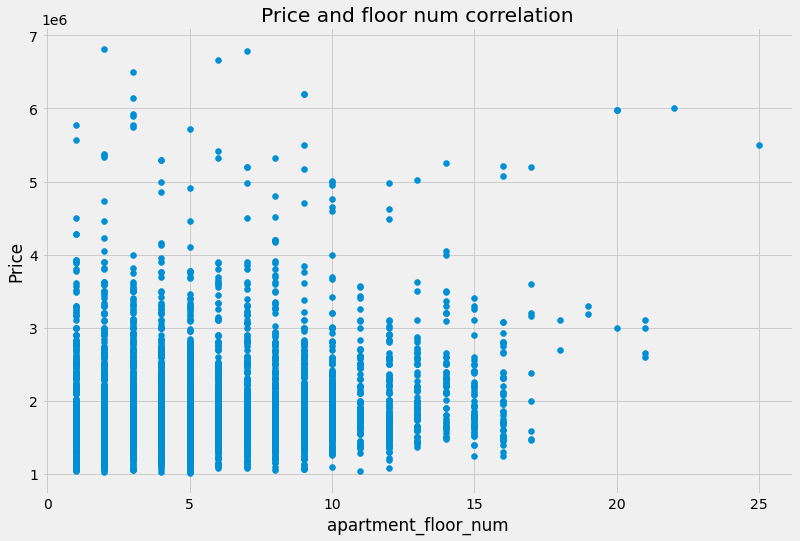

In [38]:
plt.scatter(df['apartment_floor_num'], df['price'])
plt.title('Price and floor num correlation')
plt.xlabel('apartment_floor_num')
plt.ylabel('Price')

Which floor the apartment located doesn't effect the overall price

### window_type

In [39]:
df.groupby('window_type').mean()['price'].sort_values(0, False)

window_type
Төмөр вакум   2789426.25214
Модон вакум   2557990.30483
Вакум         1992792.34714
Мод           1851839.57098
Name: price, dtype: float64

In [40]:
df.groupby('window_type').mean()['price'].sort_values().index

Index(['Мод', 'Вакум', 'Модон вакум', 'Төмөр вакум'], dtype='object', name='window_type')

### num_windows

In [41]:
df.groupby('num_windows').mean()['price'].sort_values(0, False)

num_windows
8   2577936.64079
7   2555675.84829
6   2477880.45442
5   2350314.63305
4   2057301.15893
3   1959598.74398
2   1868815.98064
1   1722469.22954
Name: price, dtype: float64

As number of windows goes up, the price goes goes up

### floor_type

In [42]:
df.groupby('floor_type').mean()['price'].sort_values(0, False)

floor_type
Ламинат   2364018.53108
Чулуу     2192557.73777
Мод       2120135.34937
Паркет    2004859.23616
Цемент    1985564.57570
Плита     1790862.67894
Name: price, dtype: float64

In [43]:
df.groupby('floor_type').mean()['price'].sort_values().index

Index(['Плита', 'Цемент', 'Паркет', 'Мод', 'Чулуу', 'Ламинат'], dtype='object', name='floor_type')

In [44]:
df.columns

Index(['rooms', 'year_built', 'location', 'building_floor_num', 'garage',
       'district', 'leasing', 'balcony', 'size_meters', 'door_type',
       'apartment_floor_num', 'window_type', 'num_windows', 'floor_type',
       'price'],
      dtype='object')

### location

In [45]:
df.groupby(['district', 'location']).mean()['price'].sort_values(0, False)

district         location    
Хан-Уул          Bella Vista    5552357.02293
                 5-р хороолол   5250000.00000
Сүхбаатар        1-р хороолол   4285714.28571
Хан-Уул          River Garden   4208238.63177
Сүхбаатар        120 мянгат     4168282.27995
                                     ...     
Баянзүрх         Шар хад        1319711.53846
Сонгино Хайрхан  5-р хороолол   1315789.47368
Чингэлтэй        Дамбадаржаа    1296296.29630
Баянгол          5 шар          1254545.45455
Сонгино Хайрхан  Баянхошуу      1119571.28429
Name: price, Length: 143, dtype: float64

In [46]:
df['district'].unique()

array(['Хан-Уул', 'Баянзүрх', 'Баянгол', 'Сонгино Хайрхан', 'Сүхбаатар',
       'Чингэлтэй'], dtype=object)

In [47]:
len(df[df['district'] == 'Баянгол']['location'].unique())

24

In [48]:
len(df[df['district'] == 'Хан-Уул']['location'].unique())

40

In [49]:
len(df[df['district'] == 'Баянзүрх']['location'].unique())

31

In [50]:
len(df[df['district'] == 'Сонгино Хайрхан']['location'].unique())

15

In [51]:
len(df[df['district'] == 'Сүхбаатар']['location'].unique())

21

In [52]:
len(df[df['district'] == 'Чингэлтэй']['location'].unique())

12

In [53]:
len(df['location'].unique())

78

In [54]:
24+40+31+15+21+12

143

<br>In this dataset there 6 differen districts and 78 different locaions. Some locations are duplicated in different districts at the same time. We can't really change the location or districs or simply delete them. 

In [55]:
df.groupby('location').mean()['price'].sort_values(0, False)

location
Bella Vista        5552357.02293
River Garden       4208238.63177
220 мянгат         3876670.72500
Japan town         3713875.26785
Romana Residence   3479379.19069
                        ...     
Эрдэнэ толгой      1403229.00462
Дамбадаржаа        1370370.37037
Амгалан            1360180.93969
Шар хад            1319711.53846
Баянхошуу          1119571.28429
Name: price, Length: 78, dtype: float64

In [56]:
df.groupby('location').mean()['price'].sort_values().index

Index(['Баянхошуу', 'Шар хад', 'Амгалан', 'Дамбадаржаа', 'Эрдэнэ толгой',
       'Чулуун овоо', 'Өлзийт хороолол', '21-р хороолол', '5 шар', 'Орбит',
       'Москва хороолол', 'Дэнжийн 1000', 'Ханын материал', 'Офицер',
       'Дарь Эх', 'Viva city', '16-р хороолол', 'Өгөөмөр захын зүүн',
       '6-р бичил', 'Нисэх', 'Био комбинат', 'Богд-Ар', '1-р хороолол',
       '10-р хороолол', 'Цэлмэг хотхон', '25-р эмийн сан', '15-р хороолол',
       '14-р хороолол', 'Толгойт', '100 айл', 'Хос-Өргөө', 'Дөлгөөн нуур',
       'UB Town', 'Алтай хотхон', 'Гандан', 'Оддын хороолол', 'Сонсголон',
       '2 - 7 буудал', 'Сансар', '3, 4 хороолол', 'Чингэлтэй', 'Нархан хотхон',
       'Бага тойрог', '13-р хороолол', 'Баянбүрд', '11-р хороолол',
       'Төмөр зам', 'Зүүн 4 зам', 'Olympic village', 'River stone',
       'Баруун 4 зам', '19-р хороолол', 'Бусад', 'Нарны хороолол',
       'Баянмонгол хороолол', 'Тээврийн товчоо', 'Яармаг', 'Хурд',
       'Их Монгол хороолол', 'Олимп хотхон', 'Зайсан', 'Хансви

### Variables and price correlations

- Numeric variables - rooms, year_built, building_floor_num, size_meter, apartment_floor_num, num_windows
- Categorical variables:
1. Weak or no direct correlation with price - 

# 1st part - First attempt to "encode" using .replace()

## Preparing data for ML

In [57]:
y.describe()

,price
count,3862.00000
mean,2013648.18990
std,694533.77134
min,1014285.71429
25%,1596275.04848
50%,1823128.27849
75%,2251940.88245
max,6818181.81818


In [58]:
X.dtypes

rooms                   object
year_built               int64
location                object
building_floor_num       int64
garage                  object
district                object
leasing                 object
balcony                 object
size_meters            float64
door_type               object
apartment_floor_num      int64
window_type             object
num_windows              int64
floor_type              object
dtype: object

In [59]:
test.dtypes

rooms                   object
year_built               int64
location                object
building_floor_num       int64
garage                  object
district                object
leasing                 object
balcony                 object
size_meters            float64
door_type               object
apartment_floor_num      int64
window_type             object
num_windows              int64
floor_type              object
dtype: object

### Rooms

In [60]:
X['rooms'].unique()

array(['5+ өрөө', '2 өрөө', '1 өрөө', '4 өрөө', '3 өрөө'], dtype=object)

In [61]:
X['rooms'] = X['rooms'].str[0]

In [62]:
X['rooms'] = X['rooms'].astype('int')

In [63]:
test['rooms'].unique()

array(['2 өрөө', '1 өрөө', '3 өрөө', '4 өрөө', '5+ өрөө'], dtype=object)

In [64]:
test['rooms'] = test['rooms'].str[0]

In [65]:
test['rooms'] = test['rooms'].astype('int')

Each number in 'rooms' column represents the number of the rooms. Only '5' means following apartment has 5 or more rooms.

### Garage

In [66]:
X['garage'].unique()

array(['Байгаа', 'Байхгүй'], dtype=object)

In [67]:
test['garage'].unique()

array(['Байхгүй', 'Байгаа'], dtype=object)

In [68]:
X['garage'] = X['garage'].replace('Байхгүй', 0).replace('Байгаа', 1)

In [69]:
test['garage'] = test['garage'].replace('Байхгүй', 0).replace('Байгаа', 1)

0 means there is no garage. 1 means there will be a garage.

### District

In [70]:
X['district'].unique()

array(['Хан-Уул', 'Баянзүрх', 'Баянгол', 'Сонгино Хайрхан', 'Сүхбаатар',
       'Чингэлтэй'], dtype=object)

In [71]:
test['district'].unique()

array(['Сүхбаатар', 'Баянзүрх', 'Баянгол', 'Чингэлтэй', 'Хан-Уул',
       'Сонгино Хайрхан'], dtype=object)

In [72]:
X['district'] = X['district'].replace('Хан-Уул', 0).replace('Баянзүрх', 1).replace('Баянгол', 2).replace('Сонгино Хайрхан', 3).replace('Сүхбаатар', 4).replace('Чингэлтэй', 5)

In [73]:
test['district'] = test['district'].replace('Хан-Уул', 0).replace('Баянзүрх', 1).replace('Баянгол', 2).replace('Сонгино Хайрхан', 3).replace('Сүхбаатар', 4).replace('Чингэлтэй', 5)

In [74]:
X['district'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [75]:
test['district'].unique()

array([4, 1, 2, 5, 0, 3], dtype=int64)

0 - Хан-Уул, 1 - Баянзүрх, 2 - Баянгол, 3- Сонгино Хайрхан, 4 - Сүхбаатар, 5 - Чингэлтэй

### Leasing

In [76]:
X['leasing'].unique()

array(['Лизинггүй', 'Хувь лизингтэй', 'Банкны лизингтэй'], dtype=object)

In [77]:
test['leasing'].unique()

array(['Лизинггүй', 'Хувь лизингтэй', 'Банкны лизингтэй'], dtype=object)

In [78]:
X['leasing'] = X['leasing'].replace('Лизинггүй', 0).replace('Хувь лизингтэй', 1).replace('Банкны лизингтэй', 2)

In [79]:
test['leasing'] = test['leasing'].replace('Лизинггүй', 0).replace('Хувь лизингтэй', 1).replace('Банкны лизингтэй', 2)

In [80]:
X['leasing'].unique()

array([0, 1, 2], dtype=int64)

In [81]:
test['leasing'].unique()

array([0, 1, 2], dtype=int64)

0 - Лизинггүй/No leasing, 1 - Хувь лизингтэй/Personal loan, 2 - Банкны лизингтэй/Bank loan

### Balcony

In [82]:
X['balcony'].unique()

array(['2 тагттай', '1 тагттай', 'Тагтгүй', '3+ тагттай'], dtype=object)

In [83]:
test['balcony'].unique()

array(['1 тагттай', 'Тагтгүй', '2 тагттай', '3+ тагттай'], dtype=object)

In [84]:
X['balcony'] = X['balcony'].str[0]

In [85]:
test['balcony'] = test['balcony'].str[0]

In [86]:
X['balcony'] = X['balcony'].replace('Т', 0)

In [87]:
test['balcony'] = test['balcony'].replace('Т', 0)

In [88]:
X['balcony'] = X['balcony'].astype(int)

In [89]:
test['balcony'] = test['balcony'].astype(int)

In [90]:
X['balcony'].unique()

array([2, 1, 0, 3])

In [91]:
test['balcony'].unique()

array([1, 0, 2, 3])

Each number in 'balcony' column represents the number of the balconies. Only '3' means following apartment has 3 or more rooms.

### Size Meters

In [92]:
X['size_meters'].describe()

count   3862.00000
mean      67.18090
std       35.99985
min       16.00000
25%       45.00000
50%       57.00000
75%       80.00000
max      400.00000
Name: size_meters, dtype: float64

Text(0.5, 0, 'Size meter')

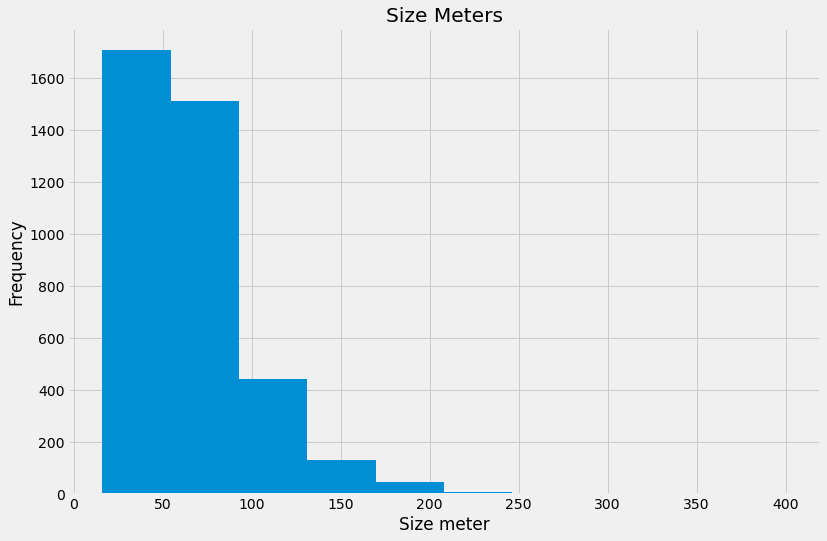

In [93]:
X['size_meters'].hist()
plt.title('Size Meters')
plt.ylabel('Frequency')
plt.xlabel('Size meter')

### Door Type

In [94]:
X['door_type'].unique()

array(['Төмөр вакум', 'Төмөр', 'Вакум', 'Бүргэд', 'Мод'], dtype=object)

In [95]:
test['door_type'].unique()

array(['Бүргэд', 'Мод', 'Төмөр', 'Төмөр вакум', 'Вакум'], dtype=object)

In [96]:
X['door_type'] = X['door_type'].replace('Бүргэд', 0).replace('Мод', 1).replace('Төмөр', 2).replace('Төмөр вакум', 3).replace('Вакум', 4)

In [97]:
test['door_type'] = test['door_type'].replace('Бүргэд', 0).replace('Мод', 1).replace('Төмөр', 2).replace('Төмөр вакум', 3).replace('Вакум', 4)

In [98]:
X['door_type'].unique()

array([3, 2, 4, 0, 1], dtype=int64)

In [99]:
test['door_type'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

0 - Бүргэд/ , 1 - Мод/Wooden, 2 - Төмөр/Iron, 3 - Төмөр вакум/Vacuum iron, 4 - Вакум/Vacuum

### Window Type

In [100]:
X['window_type'].unique()

array(['Модон вакум', 'Вакум', 'Мод', 'Төмөр вакум'], dtype=object)

In [101]:
test['window_type'].unique()

array(['Вакум', 'Төмөр вакум', 'Модон вакум', 'Мод'], dtype=object)

In [102]:
X['window_type'] = X['window_type'].replace('Модон вакум', 0).replace('Вакум', 1).replace('Мод', 2).replace('Төмөр вакум', 3)

In [103]:
test['window_type'] = test['window_type'].replace('Модон вакум', 0).replace('Вакум', 1).replace('Мод', 2).replace('Төмөр вакум', 3)

In [104]:
X['window_type'].unique()

array([0, 1, 2, 3], dtype=int64)

In [105]:
test['window_type'].unique()

array([1, 3, 0, 2], dtype=int64)

0 - Модон вакум/Vacuum wooden, 1 - Вакум/Vacuum, 2 - Мод/Wooden, 3 - Төмөр вакум/Vacuum Iron

### Floor Type

In [106]:
X['floor_type'].unique()

array(['Паркет', 'Цемент', 'Мод', 'Ламинат', 'Плита', 'Чулуу'],
      dtype=object)

In [107]:
test['floor_type'].unique()

array(['Паркет', 'Мод', 'Ламинат', 'Чулуу', 'Цемент', 'Плита'],
      dtype=object)

In [108]:
X['floor_type'] = X['floor_type'].replace('Паркет', 0).replace('Цемент', 1).replace('Мод', 2).replace('Ламинат', 3).replace('Плита', 4).replace('Чулуу', 5)

In [109]:
test['floor_type'] = test['floor_type'].replace('Паркет', 0).replace('Цемент', 1).replace('Мод', 2).replace('Ламинат', 3).replace('Плита', 4).replace('Чулуу', 5)

In [110]:
test['floor_type'].unique()

array([0, 2, 3, 5, 1, 4], dtype=int64)

In [111]:
test['floor_type'].unique()

array([0, 2, 3, 5, 1, 4], dtype=int64)

### Location

In [112]:
X['location'].unique()

array(['Зайсан', 'Нисэх', 'Бусад', '25-р эмийн сан', '21-р хороолол',
       '100 айл', '16-р хороолол', '120 мянгат', '1-р хороолол',
       '3, 4 хороолол', 'Яармаг', '13-р хороолол', 'River stone',
       '19-р хороолол', '11-р хороолол', 'Хурд', 'Хансвилл хотхон',
       'Japan town', 'Цэлмэг хотхон', 'Viva city', 'River Garden',
       '10-р хороолол', '6-р бичил', 'Офицер', 'Амгалан',
       'Москва хороолол', '14-р хороолол', '40, 50 мянгат', 'Sunrise',
       'Зүүн 4 зам', '220 мянгат', 'Сансар', 'Толгойт',
       'Их Монгол хороолол', '5 шар', 'Нарны хороолол', 'Алтай хотхон',
       'Marshall town', 'Баянмонгол хороолол', 'Төмөр зам', 'UB Town',
       'Ханын материал', 'Дөлгөөн нуур', '15-р хороолол', 'Бага тойрог',
       'King Tower', 'Нэхмэлийн шар', 'Хүннү', 'Баруун 4 зам',
       'Чингэлтэй', 'Богд-Ар', '5-р хороолол', 'Хос-Өргөө',
       'Өгөөмөр захын зүүн', 'Гандан', 'Олимп хотхон', 'Чулуун овоо',
       'Bella Vista', 'Баянхошуу', 'Тээврийн товчоо', 'Эрдэнэ толгой',

In [113]:
X['location'] = X['location'].replace('Зайсан', 0).replace('Нисэх', 1).replace('Бусад', 2).replace('25-р эмийн сан', 3).replace('21-р хороолол', 4).replace('100 айл', 5).replace('6-р хороолол', 6).replace('120 мянгат', 7).replace('1-р хороолол', 8).replace('3, 4 хороолол', 9).replace('Яармаг', 10).replace('13-р хороолол', 11).replace('River stone', 12).replace('19-р хороолол', 13).replace('11-р хороолол', 14).replace('Хурд', 15).replace('Хансвилл хотхон', 16).replace('Japan town', 17).replace('Цэлмэг хотхон', 18).replace('Viva city', 19).replace('10-р хороолол', 20).replace('6-р бичил', 21).replace('Офицер', 22).replace('Амгалан', 23).replace('Москва хороолол', 24).replace('14-р хороолол', 25).replace('40, 50 мянгат', 26).replace('Sunrise', 27).replace('Зүүн 4 зам', 28).replace('220 мянгат', 28).replace('Сансар', 29).replace('Толгойт', 30).replace('Их Монгол хороолол', 31).replace('5 шар', 32).replace('Нарны хороолол', 33).replace('Алтай хотхон', 34).replace('Marshall town', 35).replace('Баянмонгол хороолол', 36).replace('Төмөр зам', 37).replace('UB Town', 38).replace('Ханын материал', 39).replace('Дөлгөөн нуур', 40).replace('15-р хороолол', 41).replace('Бага тойрог', 42).replace('King Tower', 43).replace('Нэхмэлийн шар', 44).replace('Хүннү', 45).replace('Баруун 4 зам', 46).replace('Чингэлтэй', 47).replace('Богд-Ар', 48).replace('5-р хороолол', 49).replace('Хос-Өргөө', 50).replace('Өгөөмөр захын зүүн', 51).replace('Гандан', 52).replace('Олимп хотхон', 53).replace('Чулуун овоо', 54).replace('Bella Vista', 55).replace('Баянхошуу', 56).replace('Тээврийн товчоо', 57).replace('Эрдэнэ толгой', 58).replace('Өлзийт хороолол', 59).replace('Дамбадаржаа', 60).replace('Дэнжийн 1000', 61).replace('Баянбүрд', 62).replace('Zaisan luxury village', 63).replace('Орбит', 64).replace('Romana Residence', 65).replace('Olympic village', 66).replace('2 - 7 буудал', 67).replace('Нархан хотхон', 68).replace('Ханбүргэдэй', 69).replace('Дарь Эх', 70).replace('Оддын хороолол', 71).replace('Шар хад', 72).replace('Сонсголон', 73).replace('Био комбинат', 74).replace('Edu apart campus', 75).replace('16-р хороолол', 76).replace('River Garden', 77)

In [114]:
X['location'].unique()

array([ 0,  1,  2,  3,  4,  5, 76,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 77, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75], dtype=int64)

In [115]:
test['location'] = test['location'].replace('Зайсан', 0).replace('Нисэх', 1).replace('Бусад', 2).replace('25-р эмийн сан', 3).replace('21-р хороолол', 4).replace('100 айл', 5).replace('6-р хороолол', 6).replace('120 мянгат', 7).replace('1-р хороолол', 8).replace('3, 4 хороолол', 9).replace('Яармаг', 10).replace('13-р хороолол', 11).replace('River stone', 12).replace('19-р хороолол', 13).replace('11-р хороолол', 14).replace('Хурд', 15).replace('Хансвилл хотхон', 16).replace('Japan town', 17).replace('Цэлмэг хотхон', 18).replace('Viva city', 19).replace('10-р хороолол', 20).replace('6-р бичил', 21).replace('Офицер', 22).replace('Амгалан', 23).replace('Москва хороолол', 24).replace('14-р хороолол', 25).replace('40, 50 мянгат', 26).replace('Sunrise', 27).replace('Зүүн 4 зам', 28).replace('220 мянгат', 28).replace('Сансар', 29).replace('Толгойт', 30).replace('Их Монгол хороолол', 31).replace('5 шар', 32).replace('Нарны хороолол', 33).replace('Алтай хотхон', 34).replace('Marshall town', 35).replace('Баянмонгол хороолол', 36).replace('Төмөр зам', 37).replace('UB Town', 38).replace('Ханын материал', 39).replace('Дөлгөөн нуур', 40).replace('15-р хороолол', 41).replace('Бага тойрог', 42).replace('King Tower', 43).replace('Нэхмэлийн шар', 44).replace('Хүннү', 45).replace('Баруун 4 зам', 46).replace('Чингэлтэй', 47).replace('Богд-Ар', 48).replace('5-р хороолол', 49).replace('Хос-Өргөө', 50).replace('Өгөөмөр захын зүүн', 51).replace('Гандан', 52).replace('Олимп хотхон', 53).replace('Чулуун овоо', 54).replace('Bella Vista', 55).replace('Баянхошуу', 56).replace('Тээврийн товчоо', 57).replace('Эрдэнэ толгой', 58).replace('Өлзийт хороолол', 59).replace('Дамбадаржаа', 60).replace('Дэнжийн 1000', 61).replace('Баянбүрд', 62).replace('Zaisan luxury village', 63).replace('Орбит', 64).replace('Romana Residence', 65).replace('Olympic village', 66).replace('2 - 7 буудал', 67).replace('Нархан хотхон', 68).replace('Ханбүргэдэй', 69).replace('Дарь Эх', 70).replace('Оддын хороолол', 71).replace('Шар хад', 72).replace('Сонсголон', 73).replace('Био комбинат', 74).replace('Edu apart campus', 75).replace('16-р хороолол', 76).replace('River Garden', 77)

In [116]:
test['location'].unique()

array([ 5, 41,  9, 62,  0, 42, 40, 24,  8, 51, 11,  1, 19,  2, 36, 32, 10,
       13, 46, 12, 20, 77, 23, 65, 34, 76, 21, 25, 14, 43, 50, 37,  4, 49,
       15, 72, 26, 18, 33, 28, 53,  7, 38, 54, 22, 45, 56, 31, 29, 55, 48,
        3, 66, 68, 74, 27, 63, 39, 17, 71, 73, 16], dtype=int64)

In [117]:
X.dtypes

rooms                    int32
year_built               int64
location                 int64
building_floor_num       int64
garage                   int64
district                 int64
leasing                  int64
balcony                  int32
size_meters            float64
door_type                int64
apartment_floor_num      int64
window_type              int64
num_windows              int64
floor_type               int64
dtype: object

In [118]:
test.dtypes

rooms                    int32
year_built               int64
location                 int64
building_floor_num       int64
garage                   int64
district                 int64
leasing                  int64
balcony                  int32
size_meters            float64
door_type                int64
apartment_floor_num      int64
window_type              int64
num_windows              int64
floor_type               int64
dtype: object

## Importing Liabraries

In [119]:
from sklearn import *

In [120]:
import sklearn

## Trying different Regression Models

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=525)

### Linear Regression

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
lin_reg = LinearRegression()

In [125]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [126]:
lin_reg.score(X_test, y_test)

0.20833871396689152

In [127]:
lin_reg_pred = lin_reg.predict(X_test)

In [128]:
from sklearn.metrics import mean_squared_error

In [129]:
lin_rmse = mean_squared_error(y_test, lin_reg_pred, squared=False)
lin_rmse

635407.0138067323

### Random Forest

In [130]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
forest_reg.fit(X_train, y_train)

<ipython-input-130-bf9f8df3de1a>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [131]:
random_predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, random_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

447830.7099555979

### Prediction 1

In [226]:
housing_pred = forest_reg.predict(test)

In [229]:
housing_pred

,price
id,
3901,1741534.34487
353,1577253.44358
2978,1874576.72129
1197,1928519.27536
2121,2123560.61389
...,...
550,2083677.99350
2998,2585022.78982
1862,1869397.00718


In [228]:
housing_pred = pd.DataFrame(housing_pred, index=test.index, columns=['price'])

In [135]:
housing_pred.to_csv('prediction.csv')

### Decision Tree Regressor

In [136]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [137]:
tree_reg = tree_reg.predict(X_test)

In [138]:
tree_rmse = mean_squared_error(y_test, tree_reg, squared=False)
tree_rmse

673105.1480716665

### SVM

In [139]:
from sklearn import svm

In [140]:
svm_reg = svm.SVR()

In [141]:
svm_reg.fit(X_train, y_train)

C:\Users\homepc\anaconda3\envs\intro-python\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [142]:
svm_reg = svm_reg.predict(X_test)

In [143]:
svr_rmse = mean_squared_error(y_test, svm_reg, squared=False)
svr_rmse

746967.0810136364

### SGDRegressor

In [144]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [145]:
reg = make_pipeline(StandardScaler(),
...                     SGDRegressor(max_iter=1000, tol=1e-3))

In [146]:
reg.fit(X_train, y_train)

C:\Users\homepc\anaconda3\envs\intro-python\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [147]:
sgd_reg = reg.predict(X_test)

In [148]:
sgd_rmse = mean_squared_error(y_test, sgd_reg, squared=False)
sgd_rmse

635735.9567141259

### PLSRegression

In [149]:
from sklearn.cross_decomposition import PLSRegression

In [150]:
pls2 = PLSRegression(n_components=2)

In [151]:
pls2.fit(X_train, y_train)

PLSRegression()

In [152]:
pls_reg = pls2.predict(X_test)

In [153]:
pls_rmse = mean_squared_error(y_test, pls_reg, squared=False)
pls_rmse

641883.1658734182

### MultiOutputRegressor

In [154]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [155]:
multi_reg_pred = MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(X_train, y_train).predict(X_test)

In [156]:
multi_reg_pred1 = mean_squared_error(y_test, multi_reg_pred, squared=False)
multi_reg_pred1

466684.5993208637

### Prediction 2

In [157]:
housing_pred2 = multi_reg_pred = MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(X_train, y_train).predict(test)

In [158]:
housing_pred2 = pd.DataFrame(housing_pred2, index=test.index, columns=['price'])

In [159]:
housing_pred2.to_csv('prediction2.csv')

# 2nd part - Second attempt to encode - Label Encoding

In [160]:
y = pd.read_csv('y.csv', thousands=',')
X = pd.read_csv('X.csv', thousands=',')
test = pd.read_csv('test.csv', thousands=',')

In [161]:
X.head(1)

,rooms,year_built,location,building_floor_num,garage,district,leasing,balcony,size_meters,door_type,apartment_floor_num,window_type,num_windows,floor_type
0,5+ өрөө,2010,Зайсан,14,Байгаа,Хан-Уул,Лизинггүй,2 тагттай,105.50000,Төмөр вакум,5,Модон вакум,5,Паркет


In [162]:
y

,price
0,2654028.43602
1,1737704.91803
2,1773049.64539
3,1520527.11607
4,1107142.85714
...,...
3857,1851851.85185
3858,2063492.06349
3859,1631578.94737
3860,1763440.86022


### Location

In [164]:
location_order = ['Баянхошуу', 'Шар хад', 'Амгалан', 'Дамбадаржаа', 'Эрдэнэ толгой',
       'Чулуун овоо', 'Өлзийт хороолол', '21-р хороолол', '5 шар', 'Орбит',
       'Москва хороолол', 'Дэнжийн 1000', 'Ханын материал', 'Офицер',
       'Дарь Эх', 'Viva city', '16-р хороолол', 'Өгөөмөр захын зүүн',
       '6-р бичил', 'Нисэх', 'Био комбинат', 'Богд-Ар', '1-р хороолол',
       '10-р хороолол', 'Цэлмэг хотхон', '25-р эмийн сан', '15-р хороолол',
       '14-р хороолол', 'Толгойт', '100 айл', 'Хос-Өргөө', 'Дөлгөөн нуур',
       'UB Town', 'Алтай хотхон', 'Гандан', 'Оддын хороолол', 'Сонсголон',
       '2 - 7 буудал', 'Сансар', '3, 4 хороолол', 'Чингэлтэй', 'Нархан хотхон',
       'Бага тойрог', '13-р хороолол', 'Баянбүрд', '11-р хороолол',
       'Төмөр зам', 'Зүүн 4 зам', 'Olympic village', 'River stone',
       'Баруун 4 зам', '19-р хороолол', 'Бусад', 'Нарны хороолол',
       'Баянмонгол хороолол', 'Тээврийн товчоо', 'Яармаг', 'Хурд',
       'Их Монгол хороолол', 'Олимп хотхон', 'Зайсан', 'Хансвилл хотхон',
       'Sunrise', 'Нэхмэлийн шар', '120 мянгат', 'Zaisan luxury village',
       'King Tower', '5-р хороолол', 'Хүннү', 'Edu apart campus',
       'Marshall town', 'Ханбүргэдэй', '40, 50 мянгат', 'Romana Residence',
       'Japan town', '220 мянгат', 'River Garden', 'Bella Vista']

In [165]:
X['location'] = pd.Categorical(X['location'], categories=location_order, ordered=True)
test['location'] = pd.Categorical(test['location'], categories=location_order, ordered=True)

In [166]:
X['location'].cat.categories
test['location'].cat.categories

Index(['Баянхошуу', 'Шар хад', 'Амгалан', 'Дамбадаржаа', 'Эрдэнэ толгой',
       'Чулуун овоо', 'Өлзийт хороолол', '21-р хороолол', '5 шар', 'Орбит',
       'Москва хороолол', 'Дэнжийн 1000', 'Ханын материал', 'Офицер',
       'Дарь Эх', 'Viva city', '16-р хороолол', 'Өгөөмөр захын зүүн',
       '6-р бичил', 'Нисэх', 'Био комбинат', 'Богд-Ар', '1-р хороолол',
       '10-р хороолол', 'Цэлмэг хотхон', '25-р эмийн сан', '15-р хороолол',
       '14-р хороолол', 'Толгойт', '100 айл', 'Хос-Өргөө', 'Дөлгөөн нуур',
       'UB Town', 'Алтай хотхон', 'Гандан', 'Оддын хороолол', 'Сонсголон',
       '2 - 7 буудал', 'Сансар', '3, 4 хороолол', 'Чингэлтэй', 'Нархан хотхон',
       'Бага тойрог', '13-р хороолол', 'Баянбүрд', '11-р хороолол',
       'Төмөр зам', 'Зүүн 4 зам', 'Olympic village', 'River stone',
       'Баруун 4 зам', '19-р хороолол', 'Бусад', 'Нарны хороолол',
       'Баянмонгол хороолол', 'Тээврийн товчоо', 'Яармаг', 'Хурд',
       'Их Монгол хороолол', 'Олимп хотхон', 'Зайсан', 'Хансви

In [167]:
X['location'] = X['location'].cat.codes
test['location'] = test['location'].cat.codes

In [168]:
X['location']

0       60
1       19
2       52
3       25
4        7
        ..
3857    56
3858    44
3859    29
3860    52
3861    29
Name: location, Length: 3862, dtype: int8

In [169]:
X['location'].unique()

array([60, 19, 52, 25,  7, 29, 16, 64, 22, 39, 56, 43, 49, 51, 45, 57, 61,
       74, 24, 15, 76, 23, 18, 13,  2, 10, 27, 72, 62, 47, 75, 38, 28, 58,
        8, 53, 33, 70, 54, 46, 32, 12, 31, 26, 42, 66, 63, 68, 50, 40, 21,
       67, 30, 17, 34, 59,  5, 77,  0, 55,  4,  6,  3, 11, 44, 65,  9, 73,
       48, 37, 41, 71, 14, 35,  1, 36, 20, 69], dtype=int8)

### Rooms

Even though, the highest average price was for 4 rooms. But I think it is better to keep numbers as number of rooms.

In [170]:
X['rooms'].unique()

array(['5+ өрөө', '2 өрөө', '1 өрөө', '4 өрөө', '3 өрөө'], dtype=object)

In [171]:
X['rooms'] = X['rooms'].str[0]
test['rooms'] = test['rooms'].str[0]

In [172]:
X['rooms'] = X['rooms'].astype(int)
test['rooms'] = test['rooms'].astype(int)

In [173]:
X['rooms']

0       5
1       2
2       2
3       2
4       2
       ..
3857    2
3858    2
3859    1
3860    2
3861    2
Name: rooms, Length: 3862, dtype: int32

In [174]:
test['rooms']

0      2
1      2
2      1
3      1
4      2
      ..
961    3
962    5
963    1
964    3
965    4
Name: rooms, Length: 966, dtype: int32

### Garage

In [175]:
X['garage'].unique()

array(['Байгаа', 'Байхгүй'], dtype=object)

In [176]:
test['garage'].unique()

array(['Байхгүй', 'Байгаа'], dtype=object)

In [177]:
garage_order = ['Байхгүй', 'Байгаа']

In [178]:
X['garage'] = pd.Categorical(X['garage'], categories=garage_order, ordered=True)
test['garage'] = pd.Categorical(test['garage'], categories=garage_order, ordered=True)

In [179]:
X['garage']

0        Байгаа
1        Байгаа
2        Байгаа
3        Байгаа
4       Байхгүй
         ...   
3857     Байгаа
3858     Байгаа
3859    Байхгүй
3860    Байхгүй
3861    Байхгүй
Name: garage, Length: 3862, dtype: category
Categories (2, object): ['Байхгүй' < 'Байгаа']

In [180]:
test['garage']

0      Байхгүй
1      Байхгүй
2      Байхгүй
3      Байхгүй
4      Байхгүй
        ...   
961    Байхгүй
962     Байгаа
963    Байхгүй
964    Байхгүй
965    Байхгүй
Name: garage, Length: 966, dtype: category
Categories (2, object): ['Байхгүй' < 'Байгаа']

In [181]:
X['garage'].cat.categories
test['garage'].cat.categories

Index(['Байхгүй', 'Байгаа'], dtype='object')

In [182]:
X['garage'] = X['garage'].cat.codes
test['garage'] = test['garage'].cat.codes

### Districts

In [183]:
dist_order = ['Сонгино Хайрхан', 'Баянгол', 'Баянзүрх', 'Чингэлтэй', 'Хан-Уул', 'Сүхбаатар']

In [184]:
X['district'] = pd.Categorical(X['district'], categories=dist_order, ordered=True)
test['district'] = pd.Categorical(test['district'], categories=dist_order, ordered=True)

In [185]:
X['district'].cat.categories
test['district'].cat.categories

Index(['Сонгино Хайрхан', 'Баянгол', 'Баянзүрх', 'Чингэлтэй', 'Хан-Уул',
       'Сүхбаатар'],
      dtype='object')

In [186]:
X['district'] = X['district'].cat.codes
test['district'] = test['district'].cat.codes

### Leasing

In [187]:
leasing_order = ['Лизинггүй', 'Банкны лизингтэй', 'Хувь лизингтэй']

In [188]:
X['leasing'] = pd.Categorical(X['leasing'], categories=leasing_order, ordered=True)
test['leasing'] = pd.Categorical(test['leasing'], categories=leasing_order, ordered=True)

In [189]:
X['leasing'].cat.categories
test['leasing'].cat.categories

Index(['Лизинггүй', 'Банкны лизингтэй', 'Хувь лизингтэй'], dtype='object')

In [190]:
X['leasing'] = X['leasing'].cat.codes
test['leasing'] = test['leasing'].cat.codes

### Balcony

In [191]:
X['balcony'].unique()

array(['2 тагттай', '1 тагттай', 'Тагтгүй', '3+ тагттай'], dtype=object)

In [192]:
test['balcony'].unique()

array(['1 тагттай', 'Тагтгүй', '2 тагттай', '3+ тагттай'], dtype=object)

In [193]:
X['balcony'] = X['balcony'].str[0]
test['balcony'] = test['balcony'].str[0]

In [194]:
X['balcony'] = X['balcony'].replace('Т', 0)
test['balcony'] = test['balcony'].replace('Т', 0)

In [195]:
X['balcony'] = X['balcony'].astype(int)
test['balcony'] = test['balcony'].astype(int)

### Door type

In [196]:
door_order = ['Вакум', 'Бүргэд', 'Төмөр', 'Мод', 'Төмөр вакум']

In [197]:
X['door_type'] = pd.Categorical(X['door_type'], categories=door_order, ordered=True)
test['door_type'] = pd.Categorical(test['door_type'], categories=door_order, ordered=True)

In [198]:
X['door_type'].cat.categories
test['door_type'].cat.categories

Index(['Вакум', 'Бүргэд', 'Төмөр', 'Мод', 'Төмөр вакум'], dtype='object')

In [199]:
X['door_type'] = X['door_type'].cat.codes
test['door_type'] = test['door_type'].cat.codes

### Window type

In [200]:
window_order = ['Мод', 'Вакум', 'Модон вакум', 'Төмөр вакум']

In [201]:
X['window_type'] = pd.Categorical(X['window_type'], categories=window_order, ordered=True)
test['window_type'] = pd.Categorical(test['window_type'], categories=window_order, ordered=True)

In [202]:
X['window_type'].cat.categories
test['window_type'].cat.categories

Index(['Мод', 'Вакум', 'Модон вакум', 'Төмөр вакум'], dtype='object')

In [203]:
X['window_type'] = X['window_type'].cat.codes
test['window_type'] = test['window_type'].cat.codes

### Floor type

In [204]:
floor_order = ['Плита', 'Цемент', 'Паркет', 'Мод', 'Чулуу', 'Ламинат']

In [205]:
X['floor_type'] = pd.Categorical(X['floor_type'], categories=floor_order, ordered=True)
test['floor_type'] = pd.Categorical(test['floor_type'], categories=floor_order, ordered=True)

In [206]:
X['floor_type'].cat.categories
test['floor_type'].cat.categories

Index(['Плита', 'Цемент', 'Паркет', 'Мод', 'Чулуу', 'Ламинат'], dtype='object')

In [207]:
X['floor_type'] = X['floor_type'].cat.codes
test['floor_type'] = test['floor_type'].cat.codes

In [208]:
X.dtypes

rooms                    int32
year_built               int64
location                  int8
building_floor_num       int64
garage                    int8
district                  int8
leasing                   int8
balcony                  int32
size_meters            float64
door_type                 int8
apartment_floor_num      int64
window_type               int8
num_windows              int64
floor_type                int8
dtype: object

In [209]:
test.dtypes

id                       int64
rooms                    int32
year_built               int64
location                  int8
building_floor_num       int64
garage                    int8
district                  int8
leasing                   int8
balcony                  int32
size_meters            float64
door_type                 int8
apartment_floor_num      int64
window_type               int8
num_windows              int64
floor_type                int8
dtype: object

## Importing Libraries

In [210]:
from sklearn import *
import sklearn

## Traing different Models

In [211]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=525)

In [212]:
from sklearn.metrics import mean_squared_error

### Random Forest

In [213]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
forest_reg.fit(X_train, y_train)

<ipython-input-213-bf9f8df3de1a>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [214]:
random_predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, random_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

395999.31173372787

### Prediction 3

In [215]:
test = test.set_index('id', drop=True)

In [216]:
random_predictions3 = forest_reg.predict(test)

In [217]:
housing_pred3 = pd.DataFrame(random_predictions3, index=test.index, columns=['price'])

In [218]:
housing_pred3.to_csv("prediction3.csv")

### MultiOutputRegressor

In [219]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [220]:
multi_reg_pred = MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(X_train, y_train).predict(X_test)

In [221]:
multi_reg_pred1 = mean_squared_error(y_test, multi_reg_pred, squared=False)
multi_reg_pred1

432420.9742902568

### XG

In [222]:
import xgboost as xgb